# VISUALISATION WITH PLOTLY

In [170]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True) # need this!!!
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
path = "c:\\datasets\\kaggle\\datasets_23752_30346_countries of the world.csv";


## the file use commas as decimal separator!!!!

In [93]:
countries = pd.read_csv(path, decimal=",")

In [94]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [95]:
countries.shape

(227, 20)

In [96]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [98]:
med_birthrate = countries.Birthrate.median()
countries.Birthrate = countries.Birthrate.fillna(med_birthrate)

In [58]:
countries = countries.sort_values(by=['Population'], ascending=False)

In [59]:
# first plotly graph
fig = px.bar(countries, x='Country', y='Population',color='Population',height=800)
fig.update_layout(title='Arrangement of countries in descending order of Happiness Score',titlefont_size=20)
fig.show()

In [61]:
countries = countries.sort_values(by=['GDP ($ per capita)'], ascending=False)
# second plotly graph
fig = px.bar(countries, x='Country', y=['GDP ($ per capita)'], color = 'Area (sq. mi.)')
fig.update_layout(title='Arrangement of countries in descending order of GDP dollar per capita)',titlefont_size=20)
fig.show()

In [63]:

fig = px.pie(countries, values='Population', names='Region', title='Region-wise population',height=650)
fig.show()
#fig.write_html('tmp.html', auto_open=True)

In [99]:
#countries['Birthrate2'] = round(100*countries['Birthrate'])
fig = px.scatter(countries[countries.Population<500000000],x='Phones (per 1000)', y='GDP ($ per capita)',
                color="Region",size='Birthrate', hover_data=['Country'])
fig.show()


## scientists migration making Sankey Diagram

From a free Scientific Researcher Migrations data base I defined a certain migration abit arbitraty.

I will draw a Sankey diagram to better see the main sources and targets of these migrations.

In [100]:
path = "c:\\datasets\\kaggle\\Scientific Researcher Migrations\\ORCID_migrations_2016_12_16_by_person.csv";
migration = pd.read_csv(path)

In [101]:
migration.head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
0,0000-0001-5000-0138,NaN,CO,2014.0,CO,False,NaN,False
1,0000-0001-5000-0736,2006.0,NaN,NaN,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
3,0000-0001-5000-1181,NaN,RU,1978.0,RU,False,NaN,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False


In [103]:
migration.shape

(741867, 8)

In [209]:
# drop where there is no country2016 and earliest country
migration = migration.dropna(subset=['country_2016', 'earliest_country'])
migration.shape

(499670, 8)

In [210]:
# drop where country2016=earliest country - no real migration
migration = migration[migration.country_2016!=migration.earliest_country]
migration.shape

(75450, 8)

### top 10 out and inflow countries

In [215]:
CEarly = migration.earliest_country.value_counts()[:10]
C2016 = migration.country_2016.value_counts()[:10]
print("early:",migration.earliest_country.value_counts()[:10])
print("final:",migration.country_2016.value_counts()[:10])

early: US    9014
CN    7162
GB    6665
IN    5610
DE    3388
IT    3037
FR    2846
CA    2702
ES    2572
RU    1538
Name: earliest_country, dtype: int64
final: US    17189
GB     8350
AU     4718
DE     2857
CA     2734
ES     2332
SE     2050
FR     1803
CH     1683
KR     1583
Name: country_2016, dtype: int64


In [216]:
CEarly = CEarly.reset_index().reset_index()
CEarly.columns = ['early_index', 'country','volume']
CEarly

,early_index,country,volume
0,0,US,9014
1,1,CN,7162
2,2,GB,6665
3,3,IN,5610
4,4,DE,3388
5,5,IT,3037
6,6,FR,2846
7,7,CA,2702
8,8,ES,2572
9,9,RU,1538


In [217]:
C2016 = C2016.reset_index().reset_index()
#C2016['index']=C2016['index']+10
C2016.columns = ['late_index','country','volume']
C2016

,late_index,country,volume
0,0,US,17189
1,1,GB,8350
2,2,AU,4718
3,3,DE,2857
4,4,CA,2734
5,5,ES,2332
6,6,SE,2050
7,7,FR,1803
8,8,CH,1683
9,9,KR,1583


In [221]:
C2016['late_index'] = C2016['late_index']+10
C2016

,late_index,country,volume
0,10,US,17189
1,11,GB,8350
2,12,AU,4718
3,13,DE,2857
4,14,CA,2734
5,15,ES,2332
6,16,SE,2050
7,17,FR,1803
8,18,CH,1683
9,19,KR,1583


### join the early and late index to the data

In [223]:
## filter the database by these countries
migration_filter1 = pd.merge(migration, C2016, how='inner', left_on='country_2016', right_on='country')

In [224]:
migration_filter1 = migration_filter1.drop(['country','volume'], axis=1)
print(migration_filter1.shape)
migration_filter1.head()

(45299, 9)


,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated,late_index
0,0000-0001-5000-4542,NaN,DE,2001.0,CO,False,NaN,True,13
1,0000-0001-5014-5898,NaN,DE,2003.0,AT,False,NaN,False,13
2,0000-0001-5015-644X,2014.0,DE,2004.0,US,True,US,True,13
3,0000-0001-5016-5637,2016.0,DE,2004.0,IR,True,DE,True,13
4,0000-0001-5028-0571,2011.0,DE,1999.0,AT,True,DE,True,13


In [225]:
migration_filter2 = pd.merge(migration_filter1, CEarly, how='inner', left_on='earliest_country', right_on='country')

In [226]:
migration_filter2 = migration_filter2.drop(['country','volume'], axis=1)
print(migration_filter2.shape)
migration_filter2.head()

(26574, 10)


,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated,late_index,early_index
0,0000-0001-5015-644X,2014.0,DE,2004.0,US,True,US,True,13,0
1,0000-0001-5039-1183,2000.0,DE,1994.0,US,True,US,True,13,0
2,0000-0001-5052-2972,2016.0,DE,2010.0,US,True,US,False,13,0
3,0000-0001-5055-9644,1972.0,DE,1964.0,US,True,CA,True,13,0
4,0000-0001-5105-9596,1976.0,DE,1972.0,US,True,US,True,13,0


In [228]:
migration_filter3 = migration_filter2[pd.notna(migration_filter2.phd_country)]
migration_filter3.shape

(20672, 10)

In [230]:
agg = migration_filter2.groupby(['earliest_country' ,'country_2016'], as_index=False)['orcid_id'].count()
agg = pd.merge(agg, CEarly, how='inner', left_on='earliest_country', right_on='country')
agg = agg.drop(['country','volume'], axis=1)
agg = pd.merge(agg, C2016, how='inner', left_on='country_2016', right_on='country')
agg = agg.drop(['country','volume'], axis=1)
agg.head(10)

#df.groupby(['col2', 'col3'], as_index=False).sum()

,earliest_country,country_2016,orcid_id,early_index,late_index
0,CA,AU,197,7,12
1,CN,AU,504,1,12
2,DE,AU,173,4,12
3,ES,AU,44,8,12
4,FR,AU,134,6,12
5,GB,AU,876,2,12
6,IN,AU,238,3,12
7,IT,AU,72,5,12
8,RU,AU,41,9,12
9,US,AU,583,0,12


In [231]:
source = list(agg.early_index)
target = list(agg.late_index)
value = list(agg.orcid_id)

In [232]:
link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link)
print(data)

Sankey({
    'link': {'source': [7, 1, 4, 8, 6, 2, 3, 5, 9, 0, 7, 1, 4, 8, 6, 2, 3, 5, 9,
                        0, 7, 1, 8, 6, 2, 3, 5, 9, 0, 7, 1, 4, 6, 2, 3, 5, 9, 0, 7,
                        1, 4, 8, 2, 3, 5, 9, 0, 7, 1, 4, 8, 6, 3, 5, 9, 0, 7, 1, 4,
                        8, 6, 2, 3, 5, 9, 0, 7, 1, 4, 8, 6, 2, 3, 5, 9, 0, 7, 1, 4,
                        8, 6, 2, 3, 5, 9, 1, 4, 8, 6, 2, 3, 5, 9, 0],
             'target': [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 18, 18, 18, 18,
                        18, 18, 18, 18, 18, 18, 13, 13, 13, 13, 13, 13, 13, 13, 13,
                        15, 15, 15, 15, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 17,
                        17, 17, 17, 11, 11, 11, 11, 11, 11, 11, 11, 11, 19, 19, 19,
                        19, 19, 19, 19, 19, 19, 19, 16, 16, 16, 16, 16, 16, 16, 16,
                        16, 16, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 14, 14, 14,
                        14, 14, 14, 14, 14],
             'value': [197, 504, 173, 44, 1

In [234]:
fig = go.Figure(data)
fig.show()

### Let's give it sense

In [253]:
# for colors: https://www.color-hex.com/color-palette/95961

label1 = list(CEarly.country)
label2 = list(C2016.country)

ctries = pd.concat([CEarly.country, C2016.country]).reset_index()
ctries = ctries.drop('index', axis=1).reset_index()
label = label1+label2

label_index = list(ctries.reset_index().iloc[:,0])

customdata = ["US", "China", "Great Britain", "India","Germany","Italy","France","Canada", "Spain","Russia",
             "US", "Great Britain", "Australia","Germany","Canada", "Spain","Sweden",  "France",
              "Switzerland","South Korea"]

color_node = [
'#808B96', 
'#EC7063', '#F7DC6F', '#48C9B0', '#AF7AC5',
'#EC7063', '#EC7063',
'#F7DC6F', '#F7DC6F',
'#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0', '#48C9B0',
'#AF7AC5', '#AF7AC5', '#AF7AC5', '#264653', '#E9C46A']
col = [
'#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5',
'#EBBAB5', '#EBBAB5',
'#FEF3C7', '#FEF3C7',
'#A6E3D7', '#A6E3D7']
color_link = col +col +col +col+col +col +col +col +col +col
#, '#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7','#CBB4D5', '#CBB4D5', '#CBB4D5']

In [238]:
label_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [271]:


fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 50,
      thickness = 5,
      line = dict(color = "black", width = 0.5),
      label = label,
      customdata = customdata,
      hovertemplate='Node %{customdata} has total value %{value}<extra></extra>',  
      color = color_node
    ),
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A2, B1, ...
      target = target,
      value = value,
      customdata = customdata,
      hovertemplate='Link from node %{source.customdata}<br />'+
        'to node%{target.customdata}<br />has value %{value}'+
        '<br />', color = color_link 
  ))])

fig.update_layout(title_text="Sankey Diagram of scientists migration", font_size=10, paper_bgcolor ='white' )
fig.show()

### Can seen very nicely that the main source is China and the target is the US
If you move your mouse above the path, you can see the exact description of the migration channel

In [241]:
agg.groupby(['earliest_country'], as_index=False)['orcid_id'].sum()

,earliest_country,orcid_id
0,CA,1971
1,CN,5771
2,DE,2002
3,ES,1378
4,FR,1600
5,GB,3111
6,IN,3727
7,IT,2155
8,RU,831
9,US,4028


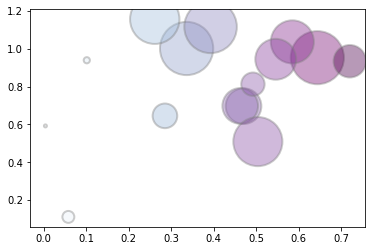

In [245]:

# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Use it with a call in cmap
plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu", alpha=0.4, edgecolors="grey", linewidth=2)
 
# You can reverse it:
#plt.scatter(x, y, s=z*2000, c=x, cmap="BuPu_r", alpha=0.4, edgecolors="grey", linewidth=2)
 
# OTHER: viridis / inferno / plasma / magma
#plt.scatter(x, y, s=z*2000, c=x, cmap="plasma", alpha=0.4, edgecolors="grey", linewidth=2)
